In [76]:
import pandas as pd

In [77]:
corn_yields = pd.read_csv('Data/CornCropYieldsCentralIL.csv')

In [78]:
corn_yields.head()

,Program,YEAR,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,YIELD,CV (%)
0,SURVEY,2024,YEAR,NaN,COUNTY,ILLINOIS,17,CENTRAL,40,LOGAN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,234.5,1.9
1,SURVEY,2024,YEAR,NaN,COUNTY,ILLINOIS,17,CENTRAL,40,MACON,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,243.8,2.1
2,SURVEY,2024,YEAR,NaN,COUNTY,ILLINOIS,17,CENTRAL,40,MCLEAN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,246.7,1.7
3,SURVEY,2024,YEAR,NaN,COUNTY,ILLINOIS,17,CENTRAL,40,MENARD,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,241.7,1.5
4,SURVEY,2024,YEAR,NaN,COUNTY,ILLINOIS,17,CENTRAL,40,PEORIA,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,218.4,6.8


In [79]:
corn_yields.columns

Index(['Program', 'YEAR', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'YIELD',
       'CV (%)'],
      dtype='object')

In [80]:
precipitation_avg = pd.read_csv("Data/PrecipitationAverage.csv")
precipitation_avg.pop('PARAMETER')
precipitation_avg.pop('LAT')
precipitation_avg.pop('LON')

0     -88.125
1     -88.750
2     -89.375
3     -90.000
4     -88.125
        ...  
395   -90.000
396   -88.125
397   -88.750
398   -89.375
399   -90.000
Name: LON, Length: 400, dtype: float64

In [81]:
month_list = ['JAN', 'FEB', 'MAR', 'APR', 'SEP', 'OCT', 'NOV', 'DEC', 'ANN']
for month in month_list:
    precipitation_avg.pop(month)

In [82]:
precipitation_avg

,YEAR,MAY,JUN,JUL,AUG
0,2000,3.41,5.84,4.24,4.06
1,2000,3.39,5.90,4.09,3.76
2,2000,3.38,5.71,3.70,3.42
3,2000,3.33,6.16,3.84,2.94
4,2000,3.35,5.23,3.10,3.26
...,...,...,...,...,...
395,2024,2.52,1.95,5.50,2.67
396,2024,3.53,2.74,4.35,2.62
397,2024,3.58,2.77,4.11,2.63
398,2024,2.92,2.76,4.32,2.34


In [83]:
corn_months = ['MAY', 'JUN', 'JUL', 'AUG']

corn_avg_by_year = (
    precipitation_avg
    .groupby('YEAR')[corn_months]
    .mean()               # average for each month within the year
    .assign(AVG_PRECIPITATION=lambda df: df.mean(axis=1))  # mean across months
    .reset_index()
)


In [84]:
corn_avg_by_year

,YEAR,MAY,JUN,JUL,AUG,AVG_PRECIPITATION
0,2000,3.385000,4.983750,3.331250,2.626875,3.581719
1,2001,3.488125,3.054375,2.812500,3.259375,3.153594
2,2002,5.867500,3.481875,2.454375,3.774375,3.894531
3,2003,3.650625,3.070625,4.817500,3.318750,3.714375
4,2004,5.033750,2.633125,3.278125,4.113750,3.764687
5,2005,1.255625,1.502500,2.625000,2.482500,1.966406
6,2006,2.439375,2.052500,3.439375,3.443125,2.843594
7,2007,1.907500,3.511875,2.867500,3.376250,2.915781
8,2008,4.134375,5.239375,5.213125,1.538750,4.031406
9,2009,4.411875,4.460000,3.636250,3.840625,4.087187


In [85]:
corn_yields.columns

Index(['Program', 'YEAR', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'YIELD',
       'CV (%)'],
      dtype='object')

In [86]:
to_pop = ['Program', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'CV (%)']
for pop in to_pop:
    corn_yields.pop(pop)

In [87]:
corn_yields = corn_yields.merge(
    corn_avg_by_year[['YEAR', 'AVG_PRECIPITATION']],
    on='YEAR',
    how='left'
)

In [88]:
corn_yields

,YEAR,YIELD,AVG_PRECIPITATION
0,2024,234.5,3.265469
1,2024,243.8,3.265469
2,2024,246.7,3.265469
3,2024,241.7,3.265469
4,2024,218.4,3.265469
...,...,...,...
261,2000,166.0,3.581719
262,2000,151.0,3.581719
263,2000,154.0,3.581719
264,2000,165.0,3.581719


In [89]:
temp_data = pd.read_csv('Data/TempAtTwoMeters.csv')

In [90]:
corn_months = ['MAY', 'JUN', 'JUL', 'AUG']

temp_avg = (
    temp_data
    .groupby('YEAR')[corn_months]
    .mean()               # average for each month within the year
    .assign(AVG_TEMPERATURE=lambda df: df.mean(axis=1))  # mean across months
    .reset_index()
)

In [91]:
corn_yields = corn_yields.merge(
    temp_avg[['YEAR', 'AVG_TEMPERATURE']],
    on='YEAR',
    how='left'
)

In [92]:
surface_wetness_data = pd.read_csv('Data/SurfaceWetness.csv')

In [93]:
corn_months = ['MAY', 'JUN', 'JUL', 'AUG']

wetness_avg = (
    surface_wetness_data
    .groupby('YEAR')[corn_months]
    .mean()               # average for each month within the year
    .assign(AVG_WETNESS=lambda df: df.mean(axis=1))  # mean across months
    .reset_index()
)

In [94]:
corn_yields = corn_yields.merge(
    wetness_avg[['YEAR', 'AVG_WETNESS']],
    on='YEAR',
    how='left'
)

In [95]:
corn_yields.pop('YEAR')
corn_yields.columns

Index(['YIELD', 'AVG_PRECIPITATION', 'AVG_TEMPERATURE', 'AVG_WETNESS'], dtype='object')

In [96]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [97]:
# Load data (replace with your full dataset)
data = corn_yields

# Check data variability
print("Unique Values per Feature:")
print(data[['AVG_PRECIPITATION', 'AVG_TEMPERATURE', 'AVG_WETNESS']].nunique())

Unique Values per Feature:
AVG_PRECIPITATION    25
AVG_TEMPERATURE      25
AVG_WETNESS          25
dtype: int64


In [98]:
# Check for outliers
Q1 = data['YIELD'].quantile(0.25)
Q3 = data['YIELD'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['YIELD'] < Q1 - 1.5*IQR) | (data['YIELD'] > Q3 + 1.5*IQR)]
print("\nYIELD Outliers:")
print(outliers)


YIELD Outliers:
     YIELD  AVG_PRECIPITATION  AVG_TEMPERATURE  AVG_WETNESS
124   96.5            1.90875        24.485937     0.504062
129   97.4            1.90875        24.485937     0.504062


In [99]:
# Define features and target
X = data[['AVG_PRECIPITATION', 'AVG_TEMPERATURE', 'AVG_WETNESS']]
y = data['YIELD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [100]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validated R²:", grid_search.best_score_)
# Train with best parameters


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validated R²: 0.8538423265700696


In [101]:
rf_model = grid_search.best_estimator_

In [102]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Model Performance:
Mean Squared Error (MSE): 98.08
Root Mean Squared Error (RMSE): 9.90
R² Score: 0.90

Feature Importance:
AVG_WETNESS          0.557322
AVG_PRECIPITATION    0.237204
AVG_TEMPERATURE      0.205474
dtype: float64



Predicted YIELD: 203.42


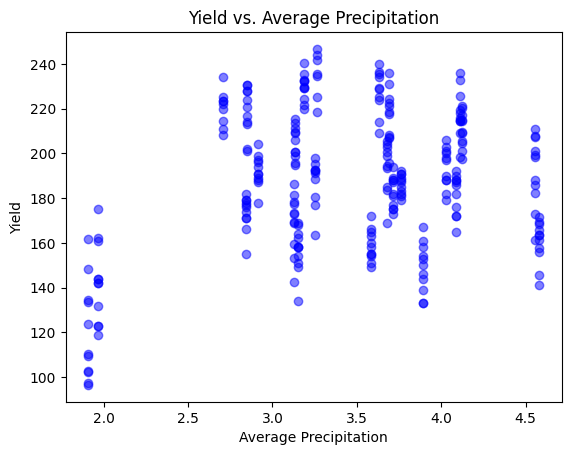

In [122]:
# Predict new data
new_data = pd.DataFrame({
    'AVG_PRECIPITATION': [3.131563],
    'AVG_TEMPERATURE': [21.406562],
    'AVG_WETNESS': [0.73]
})
prediction = rf_model.predict(new_data)
print(f"\nPredicted YIELD: {prediction[0]:.2f}")

# Plot YIELD vs. AVG_PRECIPITATION
plt.scatter(X['AVG_PRECIPITATION'], y, color='blue', alpha=0.5)
plt.xlabel('Average Precipitation')
plt.ylabel('Yield')
plt.title('Yield vs. Average Precipitation')
plt.show()

In [114]:
corn_yields.loc[corn_yields['AVG_WETNESS'] >= 0.7]

,YIELD,AVG_PRECIPITATION,AVG_TEMPERATURE,AVG_WETNESS
38,200.5,3.131563,21.406562,0.729375
39,209.6,3.131563,21.406562,0.729375
40,209.2,3.131563,21.406562,0.729375
41,206.0,3.131563,21.406562,0.729375
42,194.6,3.131563,21.406562,0.729375
...,...,...,...,...
239,154.0,3.894531,21.567344,0.708438
240,161.0,3.894531,21.567344,0.708438
241,167.0,3.894531,21.567344,0.708438
242,150.0,3.894531,21.567344,0.708438
